<h2 style='color:green' align='center' ><font size="5.5">Classification of Monkeypox VGG16 MODEL - Monkeypox vs Others- Synthetic Data</font></h2>


In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
tf.test.is_gpu_available(cuda_only=True)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

<h2 style='color:gray' ><font size="3">Loading the image set and splits using 70% of the data for training and the remaining 30% for testing</font></h2>


In [3]:
import os
import splitfolders

# input_dir = os.path.join(r'D:\datathon 2022 dataset\Data')
# output_dir = os.path.join(r'D:\datathon 2022 dataset\Data_Split')

# splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.7,.3), group_prefix=None)

In [4]:
train_dir = os.path.join(r'D:\datathon 2022 dataset\Data_Split - Mp vs Others - with synthetic data\train')
test_dir = os.path.join(r'D:\datathon 2022 dataset\Data_Split - Mp vs Others - with synthetic data\val')

<h2 style='color:gray' ><font size="3">ImageDataGenerator class which is used to perform image augmentation and flow_from_directory to read the images from a big numpy array and folders containing images.</font></h2>


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (224, 224),
                                  batch_size = 214,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                 target_size=(224, 224),
                                 batch_size = 37,
                                 class_mode = 'categorical')    
    
    return train_generator, test_generator

In [6]:
train_generator, test_generator = image_generator(train_dir, test_dir)

Found 2196 images belonging to 2 classes.
Found 899 images belonging to 2 classes.


In [7]:
from collections import Counter

counter_train = Counter(train_generator.classes)

print(counter_train.items())

dict_items([(0, 599), (1, 1597)])


In [8]:
counter_test = Counter(test_generator.classes)

print(counter_test.items()) 

dict_items([(0, 211), (1, 688)])


In [9]:
n = 0
counter_train[n]/counter_test[n]

2.838862559241706

In [10]:
classes = ['Moneypox','Others']

<h2 style='color:gray' ><font size="3">Preparing traing and testing data sets as X_train,y_train,X_test ,y_test</font></h2>

In [11]:
import numpy as np

In [12]:
X_train=[]
for j in range(len(train_generator)):    
    for m in train_generator[j][0]: 
        X_train.append(m)
        

In [13]:
y_train=[]
for i in range(len(train_generator)):
    for k in train_generator[i][1]:  
            y_train.append(np.argmax(k))           


In [14]:
X_test=[]        
for j in range(len(test_generator)):    
    for m in test_generator[j][0]: 
        X_test.append(m)

In [15]:
y_test=[]
for i in range(len(test_generator)):
    for k in test_generator[i][1]:  
            y_test.append(np.argmax(k))
           

<h2 style='color:gray' ><font size="3">Converting the feature lists into a NumPy array.</font></h2>

In [16]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [17]:
X_train.shape

(2196, 224, 224, 3)

In [18]:
y_train.shape

(2196,)

In [19]:
y_train.shape

(2196,)

In [20]:
y_test.shape

(899,)

<h2 style='color:gray' ><font size="3">Ploting sample images using matplotlib.pyplot</font></h2>

In [21]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [22]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

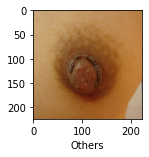

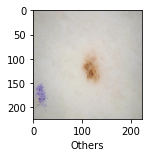

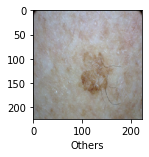

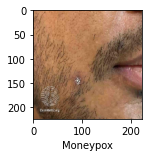

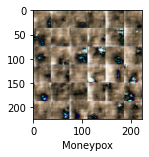

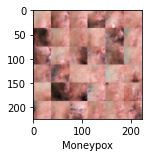

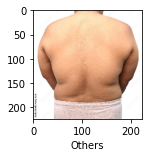

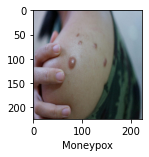

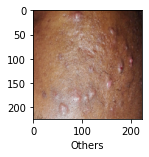

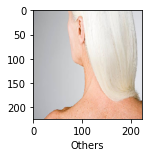

In [23]:
for i in range(10):    
    plot_sample(X_train, y_train, i)

<h2 style='color:gray' ><font size="3">Creating CNN usinga Sequential model by passing a list of layers to the Sequential constructor.</font></h2>

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [25]:
from keras.applications import VGG16
VGG = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
VGG.trainable = False

In [26]:
def print_layer_trainable(model):
    for layer in model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [27]:
print_layer_trainable(VGG)

False:	input_1
True:	block1_conv1
True:	block1_conv2
True:	block1_pool
True:	block2_conv1
True:	block2_conv2
True:	block2_pool
True:	block3_conv1
True:	block3_conv2
True:	block3_conv3
True:	block3_pool
True:	block4_conv1
True:	block4_conv2
True:	block4_conv3
True:	block4_pool
True:	block5_conv1
True:	block5_conv2
True:	block5_conv3
True:	block5_pool


In [28]:
model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    #keras.layers.Dropout(0.5),
    #keras.layers.Dense(units=1024,activation="relu"),
    #keras.layers.Dropout(0.5),
    #keras.layers.Dense(units=1024,activation="relu"),
    keras.layers.Dense(units=2,activation="softmax")
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 50178     
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [30]:
for layer in model.layers[:1]:
    layer.trainable = False

In [31]:
model.layers[-1].trainable

True

In [32]:
print_layer_trainable(model)

False:	vgg16
True:	flatten_1
True:	dense_1


In [33]:
# cnn = models.Sequential([
#     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(75, 75, 3)),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(8, activation='softmax')
# ])

<h2 style='color:gray' ><font size="3">Show model summary</font></h2>

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 50178     
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


<h2 style='color:gray' ><font size="3"> Complieing the CNN model using Optimizer and loss function before training.</font></h2>

In [35]:
# cnn.compile(optimizer='Adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [36]:
y_train_org = y_train.copy()
y_test_org = y_test.copy()

In [37]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

<h2 style='color:gray' ><font size="3">Fitting the dataset to train</font></h2>

In [38]:
history=model.fit(X_train, y_train, epochs=16)

Epoch 1/16
2196/2196 [==============================] - 23s 11ms/step - loss: 2.0211 - accuracy: 0.7928
Epoch 2/16
2196/2196 [==============================] - 16s 7ms/step - loss: 0.5482 - accuracy: 0.8966
Epoch 3/16
2196/2196 [==============================] - 16s 7ms/step - loss: 0.1603 - accuracy: 0.9577
Epoch 4/16
2196/2196 [==============================] - 16s 7ms/step - loss: 0.1992 - accuracy: 0.9536
Epoch 5/16
2196/2196 [==============================] - 16s 7ms/step - loss: 0.4179 - accuracy: 0.9240
Epoch 6/16
2196/2196 [==============================] - 16s 7ms/step - loss: 0.3005 - accuracy: 0.9476
Epoch 7/16
2196/2196 [==============================] - 16s 7ms/step - loss: 0.1305 - accuracy: 0.9745
Epoch 8/16
2196/2196 [==============================] - 16s 7ms/step - loss: 0.0653 - accuracy: 0.9822
Epoch 9/16
2196/2196 [==============================] - 16s 7ms/step - loss: 0.0449 - accuracy: 0.9854
Epoch 10/16
2196/2196 [==============================] - 16s 7ms/step - 

<h2 style='color:gray' ><font size="3">Finding  model accuracy </font></h2>

In [39]:
accuracy=model.evaluate(X_test,y_test)[1]
print("\nModel Accuracy =", (accuracy * 100.0),"%") 

899/899 [==============================] - 8s 9ms/step

Model Accuracy = 88.8765275478363 %


In [40]:
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(5)] + [1 for _ in range(95)]
pred_neg = [1 for _ in range(55)] + [0 for _ in range(9945)]
y_pred = pred_pos + pred_neg
# calculate score
score = f1_score(y_true, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.760


In [41]:
# loading multiple images
image = X_train[0].copy()
image1 = X_train[4].copy()
image2 = X_train[6].copy()

In [49]:
from skimage import io

ERROR! Session/line number was not unique in database. History logging moved to new session 2324


In [60]:
def veiw_saliency_map_for_binary_classification_model(url, the_class):
    
    #The image needs to be preprocessed before being fed to the model
    
    # read the image
    img = io.imread(url)

    # resize to 300x300 and normalize pixel values to be in the range [0, 1]
    img = cv2.resize(img, (300, 300)) / 255.0

    # add a batch dimension in front
    image = np.expand_dims(img, axis=0)
    #------------------------------------------------------------------------
    # compute the gradient of the loss with respect to the input image,
    # this should tell us how the loss value changes with respect to
    # a small change in input image pixels
    
    expected_output = tf.constant(the_class, shape=(1, 1))
    with tf.GradientTape() as tape:
        # cast image to float
        inputs = tf.cast(image, tf.float32)

        # watch the input pixels
        tape.watch(inputs)

        # generate the predictions
        predictions = model(inputs)

        # get the loss
        loss = tf.keras.losses.binary_crossentropy(
            expected_output, predictions
        )

    # get the gradient with respect to the inputs
    gradients = tape.gradient(loss, inputs)
    # The gradient tells us how much the categorical loss changes when the input change,
    #also it can indicate when certain parts of the input image have a
    #significat effect on the categorical prediction
    #------------------------------------------------------------------------
    # reduce the RGB image to grayscale
    grayscale_tensor = tf.reduce_sum(tf.abs(gradients), axis=-1)

    # normalize the pixel values to be in the range [0, 255].
    # the max value in the grayscale tensor will be pushed to 255.
    # the min value will be pushed to 0.
    normalized_tensor = tf.cast(
        255
        * (grayscale_tensor - tf.reduce_min(grayscale_tensor))
        / (tf.reduce_max(grayscale_tensor) - tf.reduce_min(grayscale_tensor)),
        tf.uint8,
    )

    # remove the channel dimension to make the tensor a 2d tensor
    normalized_tensor = tf.squeeze(normalized_tensor)
    #------------------------------------------------------------------------
    gradient_color = cv2.applyColorMap(normalized_tensor.numpy(), cv2.COLORMAP_HOT)
    gradient_color = gradient_color / 255.0
    super_imposed = cv2.addWeighted(img, 0.5, gradient_color, 0.5, 0.0)

    plt.figure(figsize=(8, 8))
    plt.imshow(super_imposed)
    plt.axis('off')
    plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 2330


In [ ]:
url = r'D:\datathon 2022 dataset\Data_Split - Mp vs Others - with synthetic data\train\Moneypox_13.jpg'
veiw_saliency_map_for_binary_classification_model(url, 0)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-61-668fdfd6fc1d>", line 2, in <module>
    veiw_saliency_map_for_binary_classification_model(url, 0)
  File "<ipython-input-60-757b2364e4f1>", line 6, in veiw_saliency_map_for_binary_classification_model
    img = io.imread(url)
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\skimage\io\_io.py", line 53, in imread
    img = call_plugin('imread', fname, plugin=plugin, **plugin_args)
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\skimage\io\manage_plugins.py", line 207, in call_plugin
    return func(*args, **kwargs)
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\skimage\io\_plugins\imageio_plugin.py", line 15, in imread
    return np.asarray(imageio_imread(*args, **kwargs))
  File "C:\Users\Vipooshan\anacond

In [ ]:
label_csv = pd.read_csv("/content/drive/MyDrive/root/dev/dog-breed/labels.csv")
labels = label_csv['breed'].to_numpy()
unique_breeds = np.unique(labels)
unique_breeds[:10], len(unique_breeds) # 120 breed in total

In [ ]:
# checking models input/output in detail
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# get training data summary
train_path = 'drive/MyDrive/root/dev/dog-breed/train/'
# note that training file path order should match to the label csv!
train_image_paths = [train_path + fname + ".jpg" for fname in label_csv['id']]
boolean_labels = [label == unique_breeds for label in labels]

# take only 100 sample as prediction will take forever on whole data set
train_image_paths = train_image_paths[:100]
boolean_labels = boolean_labels[:100]

X = train_image_paths
y = boolean_labels

len(X), len(y)

In [ ]:
# checking train image and its label
i = 44
print(unique_breeds[np.argmax(y[i])])
Image(X[i])

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 224 # resizing size

def process_image(image_path, img_size=IMG_SIZE):
    """
    Takes an image file path and turns into resized tensor
    """
    # load image and convert into tensor
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    # normalize cell's value to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

    return image

def get_image_label(image_path, label):
    """
    Takes image path and its label,
    process image and return with label as tuple (image, label) 
    """
    image = process_image(image_path)
    return image, label

def img_array_to_batch(img_array):
    """
    Takes numpy image array [224, 224, 3], 
    and convert into tensor batch
    """
    data_batch = tf.data.Dataset.from_tensor_slices(tf.constant([img_array])).batch(BATCH_SIZE)
    return data_batch

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Create batches of data out of image (X) and label (y) pairs.
    Shuffles the data if it's training data but doens't shuffle if it's validation data.
    Also accept test data as input (no label).
    """
    # if data is a test data we don't have label
    if test_data:
        print('creating test data batches ...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only file path (no labels)
        # tf batch doc: https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch

    # for validation set, no need to shuffle
    elif valid_data:
        print('creating validation data batches ...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # file path
                                                   tf.constant(y))) # labels
        
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    # for training set
    else:
        print('creating training data batches ...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # file path
                                                   tf.constant(y))) # labels


        # shuffling pathnames and lables before mapping image processor function
        # (shuffling path name is easier than shuffling entire images tensor)
        data = data.shuffle(buffer_size=len(X))
        data = data.map(get_image_label)
        data_batch = data.batch(BATCH_SIZE)
        return data_batch

def unbatchify(batched_data, label=False):
    """
    Takes batched data and unbatch it, then return the lists of features and labels
    """
    if label:
        features = []
        labels = []

        # loop through unbatched data
        for featire, label in batched_data.unbatch().as_numpy_iterator():
            features.append(featire)
            labels.append(unique_breeds[np.argmax(label)])
        return features, labels

    else:
        features = []
        for featire in batched_data.unbatch().as_numpy_iterator():
            features.append(featire)
        return features

In [ ]:
# printing test image
i = 44
test_image_path = X[i]
# true_label = unique_breeds[np.argmax(y[i])] # with label
true_label = 'unknown' # without label

print(true_label)
Image(test_image_path)

In [ ]:
img_idx = plot_features_map(img_idx)
grads = visualize_saliency(model, -1, filter_indices=y_train[0][0], 
                           seed_input=X_train[0], backprop_modifier=None,
                           grad_modifier="absolute")
predicted_label = labels[np.argmax(cnn.predict(X_train[0].reshape(1,32,32,3)),1)[0]]
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(x_test[img_idx])
ax[0].set_title('original img id {} - {}'.format(img_idx, labels[ytest[img_idx][0]]))
ax[1].imshow(grads, cmap='jet')
ax[1].set_title('saliency - predicted {}'.format(predicted_label))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-48-acaa1366a5fa>", line 1, in <module>
    img_idx = plot_features_map(img_idx)
NameError: name 'plot_features_map' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\IPython\core\interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\IPython\core\ultratb.py", line 1170, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_off

In [ ]:
# pip install scipy==1.1.0
# pip install keras-vis
from vis.visualization import visualize_saliency

def plot_saliency(img_idx=None):
    img_idx = plot_features_map(img_idx)
    grads = visualize_saliency(cnn_saliency, -1, filter_indices=ytest[img_idx][0], 
                               seed_input=x_test[img_idx], backprop_modifier=None,
                               grad_modifier="absolute")
    predicted_label = labels[np.argmax(cnn.predict(x_test[img_idx].reshape(1,32,32,3)),1)[0]]
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].imshow(x_test[img_idx])
    ax[0].set_title('original img id {} - {}'.format(img_idx, labels[ytest[img_idx][0]]))
    ax[1].imshow(grads, cmap='jet')
    ax[1].set_title('saliency - predicted {}'.format(predicted_label))

plot_saliency()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-48-f9cfb8fc2528>", line 3, in <module>
    from vis.visualization import visualize_saliency
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\vis\visualization\__init__.py", line 7, in <module>
    from .saliency import visualize_saliency_with_losses
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\vis\visualization\saliency.py", line 5, in <module>
    from scipy.misc import imresize
ImportError: cannot import name 'imresize' from 'scipy.misc' (C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\scipy\misc\__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\IPython\core\interactiveshell.py", lin

In [ ]:
from keras.applications.vgg16 import VGG16
from vis.utils import utils
from keras import activations
from vis.visualization import visualize_saliency


# Convert the image to a numpy array and expand the dimensions
x = img_to_array(image)
x = np.expand_dims(x, axis=0)

# Preprocess the image
x = preprocess_input(x)

# Generate the saliency map
saliency_map = visualize_saliency(model, -1, filter_indices=None, seed_input=x)

# Display the saliency map
plt.imshow(saliency_map, cmap='jet')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-6483f06fb4d6>", line 4, in <module>
    from vis.visualization import visualize_saliency
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\vis\visualization\__init__.py", line 7, in <module>
    from .saliency import visualize_saliency_with_losses
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\vis\visualization\saliency.py", line 5, in <module>
    from scipy.misc import imresize
ImportError: cannot import name 'imresize' from 'scipy.misc' (C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\scipy\misc\__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\IPython\core\interactiveshell.py", lin

In [ ]:
from vis.visualization import visualize_saliency
from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-b7c4e5f08da7>", line 1, in <module>
    from vis.visualization import visualize_saliency
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\vis\visualization\__init__.py", line 7, in <module>
    from .saliency import visualize_saliency_with_losses
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\vis\visualization\saliency.py", line 5, in <module>
    from scipy.misc import imresize
ImportError: cannot import name 'imresize' from 'scipy.misc' (C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\scipy\misc\__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\IPython\core\interactiveshell.py", lin

In [ ]:
# Find the index of the to be visualized layer above
layer_index = utils.find_layer_idx(model, 'visualized_layer')

In [42]:
def get_saliency_map(model, image, class_idx):
    with tf.GradientTape() as tape:
        tape.watch(image)
        predictions = model(image)
        
        loss = predictions[:, class_idx]
    
    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, image)
    
    # take maximum across channels
    gradient = tf.reduce_max(gradient, axis=-1)
    
    # convert to numpy
    gradient = gradient.numpy()
    
    # normaliz between 0 and 1
    min_val, max_val = np.min(gradient), np.max(gradient)
    smap = (gradient - min_val) / (max_val - min_val + keras.backend.epsilon())
    
    return smap

ERROR! Session/line number was not unique in database. History logging moved to new session 2318


In [43]:
# loading multiple images
image = X_train[0].copy()
image1 = X_train[4].copy()
image2 = X_train[6].copy()

In [44]:
image = tf.convert_to_tensor(image)

In [ ]:
sm = get_saliency_map(model, image, classes[int(y_train[0][1])])

plt.imshow(sm)
# plt.xlabel(classes[y_train[6]])
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-3fffac87482b>", line 1, in <module>
    sm = get_saliency_map(model, image, classes[int(y_train[0][1])])
  File "<ipython-input-42-3bbc3d7e4585>", line 4, in get_saliency_map
    predictions = model(image)
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\keras\backend\tensorflow_backend.py", line 75, in symbolic_fn_wrapper
    return func(*args, **kwargs)
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\keras\engine\base_layer.py", line 489, in __call__
    output = self.call(inputs, **kwargs)
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\keras\engine\network.py", line 583, in call
    output_tensors, _, _ = self.run_internal_graph(inputs, masks)
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packa

In [ ]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# convert the image pixels to a numpy array
image = img_to_array(image)
image1 = img_to_array(image1)
image2 = img_to_array(image2)

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image1 = image1.reshape((1, image1.shape[0], image1.shape[1], image1.shape[2]))
image2 = image2.reshape((1, image2.shape[0], image2.shape[1], image2.shape[2]))

In [ ]:
# prepare the image for the VGG model
image = preprocess_input(image)
image1 = preprocess_input(image1)
image2 = preprocess_input(image2)

In [ ]:
#making predictions
yhat = model.predict(image)
yhat1 = model.predict(image1)
yhat2 = model.predict(image2)

In [ ]:
yhat

In [ ]:
classes[int(y_train[0][1])]

In [ ]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
label1 = decode_predictions(yhat1)
label2 = decode_predictions(yhat2)
# retrieve the most likely result, e.g. highest probability
label = label[0][1]
label1 = label1[0][1]
label2 = label2[0][1]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))
print('%s (%.2f%%)' % (label1[1], label1[2]*100))
print('%s (%.2f%%)' % (label2[1], label2[2]*100))

In [ ]:
#input images
import matplotlib.pyplot as plt

_img = X_train[0].copy()
plt.imshow(_img)
# plt.xlabel(classes[y_train[0]])
plt.show()

_img1 = X_train[4].copy()
plt.imshow(_img1)
# plt.xlabel(classes[y_train[4]])
plt.show()

_img2 = X_train[6].copy()
plt.imshow(_img2)
# plt.xlabel(classes[y_train[6]])
plt.show()

In [ ]:
#top 5 predictions
import numpy as np

class_idxs_sorted = np.argsort(yhat.flatten())[::-1]
class_idxs_sorted1 = np.argsort(yhat1.flatten())[::-1]
class_idxs_sorted2 = np.argsort(yhat2.flatten())[::-1]
topNclass         = 5

print('for first image\n')

for i, idx in enumerate(class_idxs_sorted[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat[0,idx]))

print('for second image\n')

for i, idx in enumerate(class_idxs_sorted1[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat1[0,idx]))

print('for third image\n')


for i, idx in enumerate(class_idxs_sorted2[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat2[0,idx]))

In [ ]:
from vis.utils import utils

layer_idx = utils.find_layer_idx(model, 'predictions')

In [ ]:
# Swap softmax with linear
model.layers[layer_idx].activation = keras.activations.linear
model = utils.apply_modifications(model)

In [ ]:
# Saliency Maps
from vis.visualization import visualize_saliency
img               = img_to_array(_img)
img               = preprocess_input(img)
class_idx = class_idxs_sorted[0]
grad_top1 = visualize_saliency(model,
                               layer_idx,
                               filter_indices = class_idx,
                               seed_input     = img[np.newaxis,...])

img1               = img_to_array(_img1)
img1               = preprocess_input(img1)
class_idx1 = class_idxs_sorted[0]
grad_top11 = visualize_saliency(model,
                               layer_idx,
                               filter_indices = class_idx,
                               seed_input     = img1[np.newaxis,...])

img2               = img_to_array(_img2)
img2               = preprocess_input(img2)
class_idx2 = class_idxs_sorted[0]
grad_top12 = visualize_saliency(model,
                               layer_idx,
                               filter_indices = class_idx,
                               seed_input     = img2[np.newaxis,...])

In [ ]:
# visualize SALIENCY MAPS
def plot_map(grads,_img,yhat):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(_img)
    axes[1].imshow(_img)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    plt.suptitle("Pr(class={}) = {:5.2f}".format(
                      classlabel[class_idx],
                      yhat[0,class_idx]))
plot_map(grad_top1,_img,yhat)
plot_map(grad_top11,_img1,yhat1)
plot_map(grad_top12,_img2,yhat2)

<h2 style='color:gray' ><font size="3">Visualizeing loss history </font></h2>

In [ ]:
(history.history).keys()

In [ ]:
# Get accuracy and test loss histories
loss = history.history['loss']
accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(loss) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, accuracy, 'b-')
plt.legend(['Epoch Loss', 'Epoch Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Histories (Accuracy and Loss)')
plt.show();

<h2 style='color:gray' ><font size="3">Checking model prediction</font></h2>

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

In [ ]:
#Correct Anomalies 
plot_sample(X_test, y_test_org,4)

In [ ]:
#Predict Anomalies by model
classes[y_classes[4]]

<h2 style='color:gray' ><font size="3">Computing confusion matrix to evaluate the accuracy of a classification.</font></h2>

In [ ]:
classes

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_org,y_classes)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_org,y_classes)
cm

<h2 style='color:gray' ><font size="3">Visualizing model accuracy using seaborn heatmap</font></h2>

In [ ]:
import seaborn as sns

plt.figure(figsize=(14,7))
sns.heatmap(cm,annot=True)

plt.ylabel('( y_test )')
plt.xlabel('( y_predicted )')
plt.xticks(range(len(classes)),classes, rotation=20)
plt.yticks(range(len(classes)),classes,rotation=0)

plt.show()